# Production-diffusion-degradation

In [1]:
import numpy as np
import matplotlib.patches as patches
from tqdm import tqdm # library to visualize the progress status of a python loop
from euler_scheme_1d_with_growth.diffusion_equation import *
from euler_scheme_1d_with_growth.matplotlib_defaults import *

In [2]:
D     = 1.0  # Diffusion coefficient
beta  = 1.0  # Degradation rate
alpha = 1.0  # Production rate

w     = 0.4  # width of production region
x0    = 0.4  # starting position width of production region

L0   = 1.8
Lmax = 2 * L0    # system size boundaries are at the positions 0 and +Lmax

In [3]:
# parameters for Euler scheme

tmax = 5    # time till what to calculate solution

dt   = 1e-5 # time step
dx   = 1e-2 # spatial step

In [4]:
# arrays for space and time coordinates

t   = np.linspace(0, tmax, int(tmax/dt)+1)
ndt = len(t)

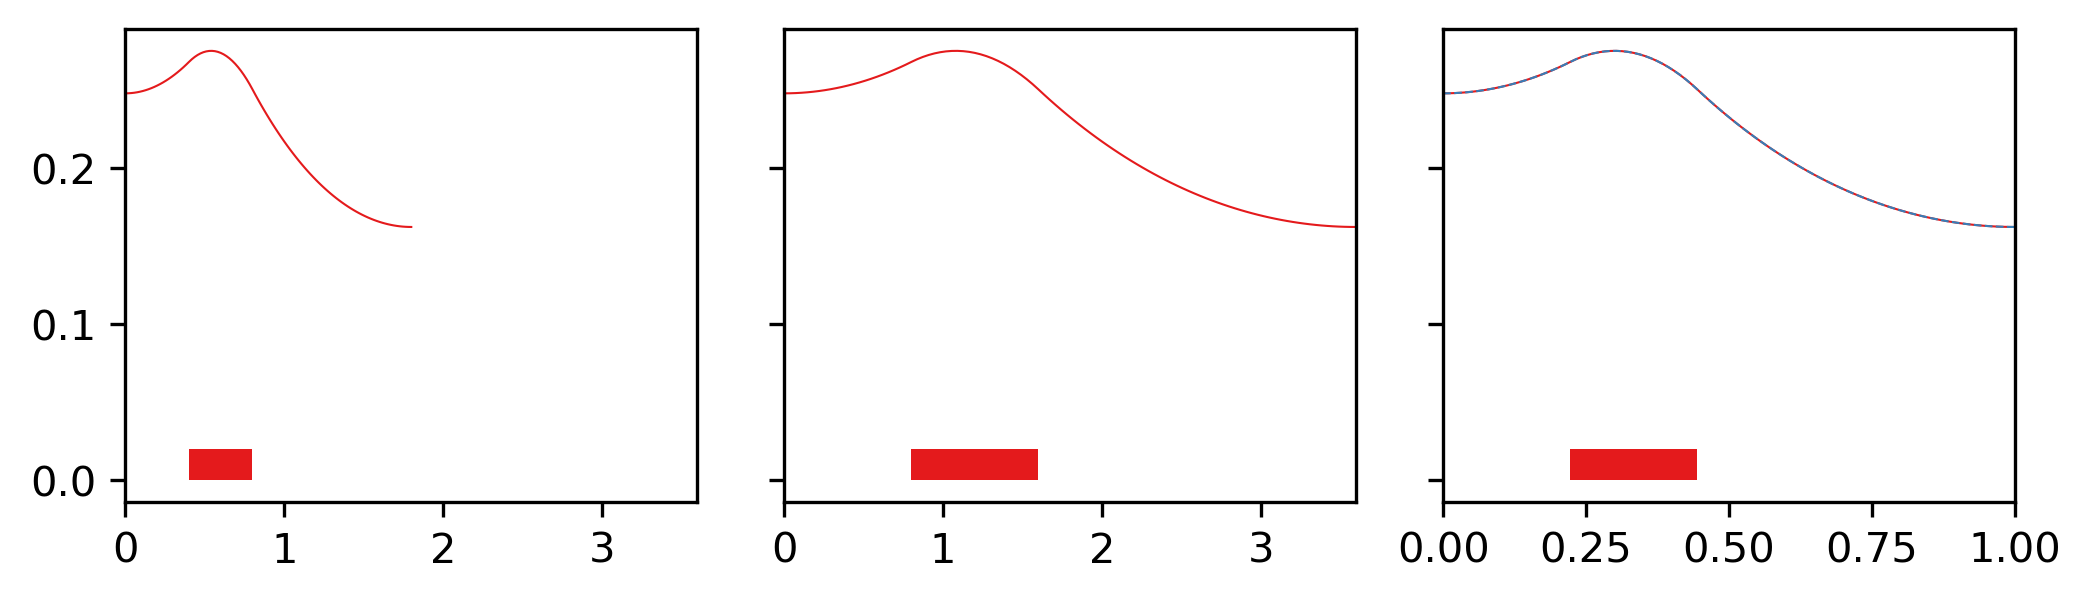

In [16]:
nrows, ncols = 1, 3
colors = plt.cm.Set1.colors

fig, ax = plt.subplots(nrows, ncols, figsize=(default_figsize["large"][0], default_figsize["large"][1]/4), sharex=False, sharey=True, dpi=300)

i = 0
L1 = L0
x1 = np.linspace(0, L1, 100)
s1 = steady_solution(x1, x0, (D/beta)**0.5, alpha, w, beta, D, L1)
ax[i].plot(x1, s1, color=colors[0])
ax[i].add_patch(
         patches.Rectangle((x0, 0), w, 0.02, edgecolor=None, facecolor=colors[0])
    )
ax[i].set_xlim(0, 2*L0)
#ax[i].set_ylim(0, 0.5)

i = 1
L2 = 2 * L0
x2 = np.linspace(0, L2, 100)
s2 = steady_solution(x2, 2*x0, 2 * (D/beta)**0.5, alpha, 2*w, beta, D*4, L2)
ax[i].plot(x2, s2, color=colors[0])
ax[i].add_patch(
         patches.Rectangle((2*x0, 0), 2*w, 0.02, edgecolor=None, facecolor=colors[0])
    )
ax[i].set_xlim(0, 2*L0)
#ax[i].set_ylim(0, 0.5)

i = 2
ax[i].plot(x1/L1, s1, color=colors[0])
ax[i].plot(x2/L2, s2, linestyle='--', color=colors[1])

ax[i].add_patch(
         patches.Rectangle((x0/L1, 0), w/L1, 0.02, edgecolor=None, facecolor=colors[0])
    )

ax[i].set_xlim(0, 1)
#ax[i].set_ylim(0, 0.5)

plt.tight_layout()
plt.savefig('fig/perfect_scaling.pdf')
plt.show()